In [ ]:
import pandas as pd
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
fPath = '/content/drive/MyDrive/bookit_20250508_093128.csv'
org_book = pd.read_csv(fPath)

In [ ]:
org_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   인덱스     265 non-null    int64 
 1   제목      265 non-null    object
 2   저자      265 non-null    object
 3   출판사     264 non-null    object
 4   독서상태    265 non-null    object
 5   생성일     257 non-null    object
 6   시작일     221 non-null    object
 7   읽은 날짜   221 non-null    object
 8   중단일     8 non-null      object
 9   메모1     85 non-null     object
 10  메모2     30 non-null     object
 11  메모3     14 non-null     object
 12  메모4     8 non-null      object
 13  메모5     7 non-null      object
 14  메모6     4 non-null      object
 15  메모7     2 non-null      object
 16  메모8     1 non-null      object
dtypes: int64(1), object(16)
memory usage: 35.3+ KB


In [ ]:
#r각 열의 고유값 갯수 확인
org_book.value_counts()

,,,,,,,,,,,,,,,,,count
인덱스,제목,저자,출판사,독서상태,생성일,시작일,읽은 날짜,중단일,메모1,메모2,메모3,메모4,메모5,메모6,메모7,메모8,


In [ ]:
org_book.head()

,인덱스,제목,저자,출판사,독서상태,생성일,시작일,읽은 날짜,중단일,메모1,메모2,메모3,메모4,메모5,메모6,메모7,메모8
0,1,동급생,프레드 울만,열린책들,읽은 책,NaN,NaN,2021-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,광염 소나타,김동인,문학일독,읽은 책,NaN,NaN,2021-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,리버보이,팀 보울러,놀,읽은 책,NaN,NaN,2021-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,참을 수 없는 존재의 가벼움,밀란 쿤데라,민음사,읽은 책,NaN,NaN,2021-02-02,NaN,개어려운데 단순하게 보면 이혼남이랑 집안탈출과 신분 상승을 바라는 여자의 우당탕탕 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,샹젤리제 거리의 작은 향수가게,레베카 레이즌,황금시간,읽은 책,NaN,NaN,2021-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
reData = org_book.loc[:, ['인덱스', '제목', '출판사', '읽은 날짜']]

In [ ]:
reData = reData.sort_values(by = '읽은 날짜')
reData.head(3)

,인덱스,제목,출판사,읽은 날짜
0,1,동급생,열린책들,2021-01-26
1,2,광염 소나타,문학일독,2021-01-26
2,3,리버보이,놀,2021-01-27


#내가 책은 안 읽는 시기가 달에 의해 결정되는지 보고 싶어.

⚓ 해야할 일
---
1. 년 월로 읽은 날짜 데이터 컬럼 추가(년도, 월)
2. 각 해의 평균 독서량 정의
3. 데이터 시각화(차트별)

In [ ]:
reData['읽은 날짜'] = reData['읽은 날짜'].astype(str).str.replace('-', '', regex = False)
reData.head(3)

,인덱스,제목,출판사,읽은 날짜
0,1,동급생,열린책들,20210126
1,2,광염 소나타,문학일독,20210126
2,3,리버보이,놀,20210127


In [ ]:
reData['읽은 날짜(년)'] = reData['읽은 날짜'].astype(str).str.slice(0,4)
reData['읽은 날짜(월)'] = reData['읽은 날짜'].astype(str).str.slice(4,6)
reData['읽은 날짜(년월)'] = reData['읽은 날짜'].astype(str).str.slice(0,6)

In [ ]:
#아직 읽지 않은 데이터는 완독이 아니므로 제외
reData = reData[reData['읽은 날짜'] != 'nan']

In [ ]:
reData.rename(columns={
    '제목': 'title',
    '출판사': 'publisher',
    '읽은 날짜' : 'readDate',
    '읽은 날짜(년)' : 'readYear',
    '읽은 날짜(월)' : 'readMonth',
    '읽은 날짜(년월)' : 'readYm'
}, inplace=True)

In [ ]:
reDataCountYm = reData.pivot_table(values='title', index='readYear', columns='readMonth', aggfunc='count', fill_value ='0')

reDataCountYm

<ipython-input-84-ca84d78d65be>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  reDataCountYm = reData.pivot_table(values='title', index='readYear', columns='readMonth', aggfunc='count', fill_value ='0')


readMonth,01,02,03,04,05,06,07,08,09,10,11,12
readYear,,,,,,,,,,,,
2021,3,5,0,0,0,0,0,8,1,0,6,9
2022,7,2,4,3,6,1,1,3,1,1,4,5
2023,7,4,1,0,5,14,4,7,11,4,8,8
2024,3,4,2,5,10,7,5,5,14,8,2,2
2025,2,4,2,2,1,0,0,0,0,0,0,0


In [ ]:
#빠진 결측치를 가져올 수도 없고 달 별로 확인이 불가해서 위의 코드로 변경함

#reDataCountYm = reData.pivot_table(index= '읽은 날짜(년월)', values = '제목', aggfunc  = 'count')
#reDataCountYm = reDataCountYm.sort_values('읽은 날짜(년월)')
#reDataCountYm.head(3)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#TypeError: Image data of dtype object cannot be converted to float로 인해 데이터 값을 float으로 변경
reDataCountYm =  reDataCountYm.astype(float)

#데이터 값 조정을 위한 max값 알아내기
#reDataCountYm.describe() # 최대 14권

In [ ]:
reDataCountYm.describe()

readMonth,01,02,03,04,05,06,07,08,09,10,11,12
count,5.000000,5.000000,5.00000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,4.400000,3.800000,1.80000,2.00000,4.400000,4.400000,2.000000,4.600000,5.400000,2.600000,4.000000,4.800000
std,2.408319,1.095445,1.48324,2.12132,4.037326,6.107373,2.345208,3.209361,6.580274,3.435113,3.162278,3.834058
min,2.000000,2.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4.000000,1.00000,0.00000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,2.000000,2.000000
50%,3.000000,4.000000,2.00000,2.00000,5.000000,1.000000,1.000000,5.000000,1.000000,1.000000,4.000000,5.000000
75%,7.000000,4.000000,2.00000,3.00000,6.000000,7.000000,4.000000,7.000000,11.000000,4.000000,6.000000,8.000000
max,7.000000,5.000000,4.00000,5.00000,10.000000,14.000000,5.000000,8.000000,14.000000,8.000000,8.000000,9.000000


<Axes: xlabel='readMonth', ylabel='readYear'>

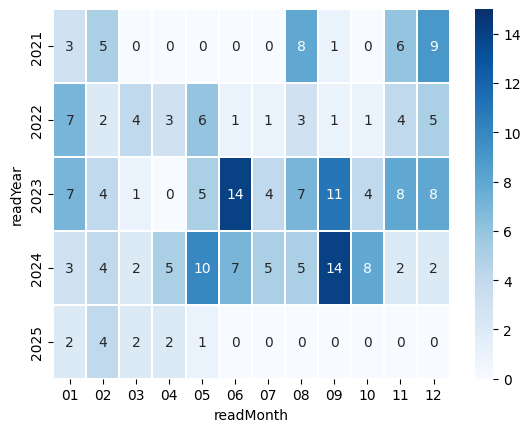

In [ ]:
sns.heatmap(reDataCountYm, vmin = 0, vmax = 15, fmt = '.0f', linewidths = 0.3,cmap = 'Blues', annot=True)

<Axes: xlabel='readMonth', ylabel='readYear'>

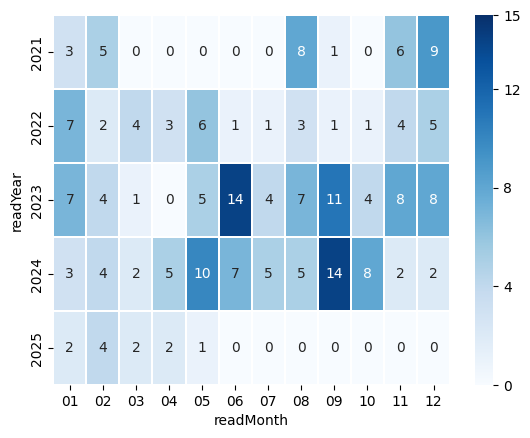

In [ ]:
#범위 간격 조정
bounds = [0, 4, 8, 12, 15]
sns.heatmap(reDataCountYm, vmin = 0, vmax = 15, fmt = '.0f', linewidths = 0.3,cmap = 'Blues', annot=True, cbar_kws={"ticks": bounds})

<Axes: xlabel='readMonth', ylabel='readYear'>

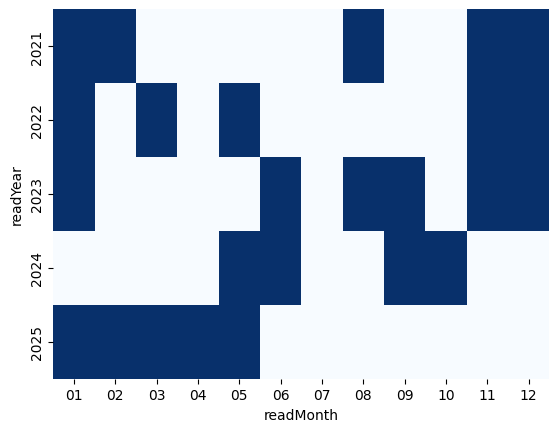

In [ ]:
import logging
import warnings

logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)
warnings.filterwarnings("ignore", category=UserWarning, module='matplotlib.font_manager') # 계속 폰트 경고 떠서 막기

from pickle import TRUE
# 히트맵으로 보니 눈에 잘 안들어옴..
# 내가 확인하고 싶은 건
# 1. 년 대비 월별 독서량을 통해 1년간 어떤 달에 평균적으로 많이 읽었는지 확인
# 2. 2021~2025년까지 평균대비 많은 독서량을 가진 시기가 겹치는지


reDataCountYm['mean per month'] = reDataCountYm.mean(axis = 1)

# 월별 컬럼만 선택
month_cols = ['01','02','03','04','05','06','07','08','09','10','11','12']

reDataCountYm['mean per month'] = round(reDataCountYm['mean per month'],1)

#reDataCountYm['월 평균'] >= reDataCountYm['읽은 날짜(월)'].sum(axis = 1) 에러
#gt 는 >= 의 기호값과 동일함
#axis = 0 열단위, axis = 1 행단위
cond = reDataCountYm[month_cols].gt(reDataCountYm['mean per month'], axis = 0)

tf_data =  reDataCountYm[cond].fillna(0)

tf_data = tf_data.ne(0)
tf_data = tf_data.drop(columns=['mean per month'])

sns.heatmap(tf_data, cmap='Blues', cbar=False)

<Axes: xlabel='readMonth', ylabel='readYear'>

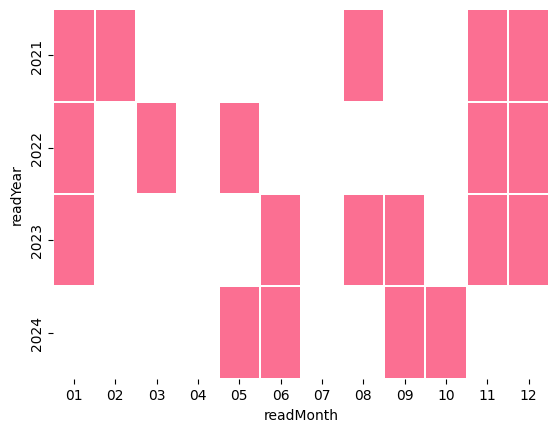

In [ ]:
#색상 변경
from matplotlib.colors import ListedColormap

tf_data =  reDataCountYm[cond].fillna(0)
tf_data = tf_data[tf_data.index != '2025'] # 2025년은 현재라 의미없으므로 삭제
tf_data = tf_data.drop(columns=['mean per month']) #평균값 의미 없어서 삭제
tf_data[month_cols] = tf_data[month_cols].astype(int)

custom_cmap = ListedColormap(['#ffffff',  '#ffe3ec', '#ffb3c6', '#ff8fab', '#fb6f92'])

sns.heatmap(tf_data, vmin = 0, vmax = 1, fmt = 's', linewidths = 0.1, cmap = custom_cmap, annot= False, cbar= False)

<Axes: xlabel='readMonth', ylabel='readYear'>

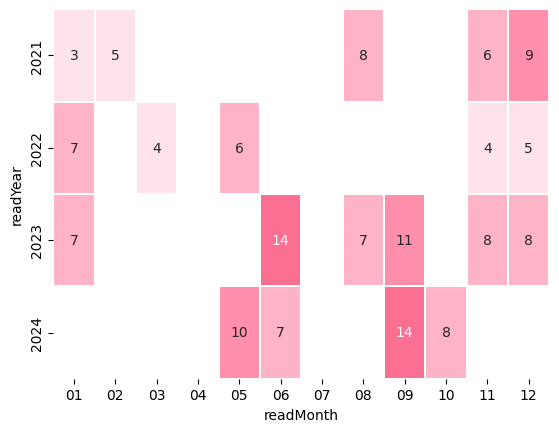

In [ ]:
new_annot = tf_data.replace({0: '', 1: '1'}).astype(str) #0권이면 표기x
new_bound = [3,6,9,12, 15]

sns.heatmap(tf_data, vmin = 0, vmax = 14, fmt = 's', linewidths = 0.1, cmap = custom_cmap, annot= new_annot, cbar= False, cbar_kws={"ticks": new_bound})

#색상 표기 : 각 해의 평균 독서량보다 많음
#채도 표기 : 전체 해수로 따졌을 때의 독서량

# 결론

1월과 11~12월에는 각 년의 평균 독서량보다 많이 읽는다.